# Classification of Handwritten Digits

## Installs & Upgrades (remove comments if you deem it necessary)

In [415]:
#!pip install numpy --upgrade
#!pip install pandas --upgrade
#!pip install matplotlib --upgrade
#!pip install scipy --upgrade
#!pip install scikit-learn --upgrade

## Import Files

In [416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import norm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

## Read CSV

In [417]:
training_images = 'Data/azip.csv'
digits = 'Data/dzip.csv'
test_images = 'Data/testzip.csv'
test_digits = 'Data/dtest.csv'

### Preview the Training Images

In [418]:
x_train = pd.read_csv(training_images, header = None)
print(x_train)

      0      1      2     3      4     5      6     7      8     9     ...  \
0   -1.000 -1.000 -1.000  -1.0 -1.000  -1.0 -1.000  -1.0 -1.000  -1.0  ...   
1   -1.000 -1.000 -1.000  -1.0 -1.000  -1.0 -1.000  -1.0 -1.000  -1.0  ...   
2   -1.000 -1.000 -1.000  -1.0 -1.000  -1.0 -1.000  -1.0 -1.000  -1.0  ...   
3   -1.000 -0.813 -1.000  -1.0 -1.000  -1.0 -0.830  -1.0 -1.000  -1.0  ...   
4   -1.000 -0.671 -1.000  -1.0 -1.000  -1.0  0.442  -1.0 -1.000  -1.0  ...   
..     ...    ...    ...   ...    ...   ...    ...   ...    ...   ...  ...   
251 -0.991  0.126 -0.179  -1.0  0.439  -1.0 -1.000  -1.0 -0.811  -1.0  ...   
252 -1.000 -0.095 -1.000  -1.0 -0.199  -1.0 -1.000  -1.0 -1.000  -1.0  ...   
253 -1.000 -0.671 -1.000  -1.0 -0.883  -1.0 -1.000  -1.0 -1.000  -1.0  ...   
254 -1.000 -0.828 -1.000  -1.0 -1.000  -1.0 -1.000  -1.0 -1.000  -1.0  ...   
255 -1.000 -1.000 -1.000  -1.0 -1.000  -1.0 -1.000  -1.0 -1.000  -1.0  ...   

      1697   1698   1699  1700  1701   1702  1703   1704  1705 

### Preview the Digits

In [419]:
y_train = pd.read_csv(digits, header = None)
print(y_train)

   0     1     2     3     4     5     6     7     8     9     ...  1697  \
0     6     5     4     7     3     6     3     1     0     1  ...     8   

   1698  1699  1700  1701  1702  1703  1704  1705  1706  
0     0     5     1     9     8     9     7     9     8  

[1 rows x 1707 columns]


### Prepare the test data as well

In [420]:
x_test = pd.read_csv(test_images, header = None)
y_test = pd.read_csv(test_digits, header = None)

### Create 10 matrices, one for each digit. Store all the matrices in a dictionary

In [421]:
# Separate the data
matrix_dictionary = {}
for i in range(10):
    matrix_dictionary.update({"A"+str(i):x_train.loc[:,list(y_train.loc[0,:]==i)]})
print(matrix_dictionary['A1'].shape)

labels = {0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9"}

(256, 252)


### Perform SVD for each matrix and save each U, S, T in separate dictionaries

In [422]:
left_singular={}
singular_matrix={}
right_singular={}
for i in range(10):
    U, S, V_T = np.linalg.svd(matrix_dictionary['A'+str(i)], full_matrices=False)
    S= S[:21]
    left_singular.update({"u"+str(i):U})
    singular_matrix.update({"s"+str(i):S})
    right_singular.update({"v_t"+str(i):V_T})
print(left_singular['u0'].shape)

(256, 256)


#### About "ima2.m":

The exercise includes a Matlab file "ima2.m" that we need to recreate in this case, as this implementation is in Python. Instead of creating a new function from scratch, we will take advantage of matplotlib's "imshow". We set the colormap to be exactly the colormap suggested in ima2.m. We also reshape to the desired shape which is 16x16. Subsequently, we print "5" in 10 different ways using several columns of the matrix U.

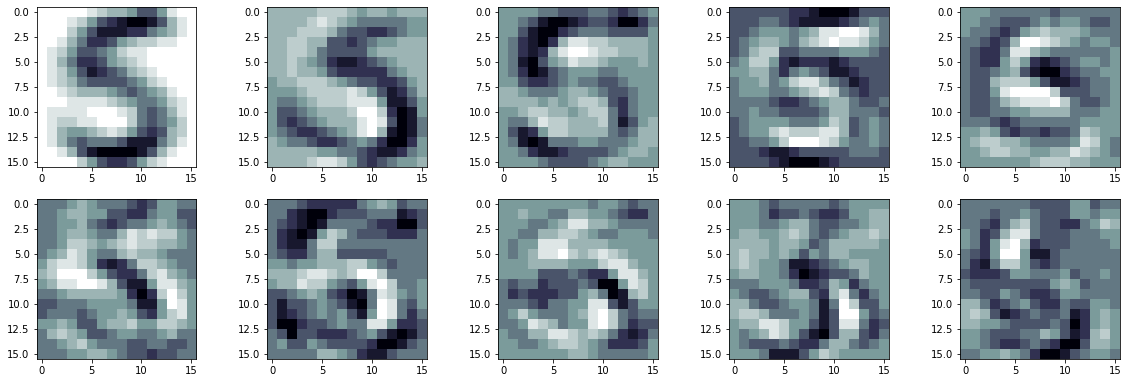

In [423]:
plt.figure(figsize=(20,10))
columns = 5
mymap1 = [1.0000, 1.0000, 1.0000, 0.8715, 0.9028, 0.9028, 0.7431, 0.8056, 0.8056, 0.6146, 0.7083, 0.7083, 0.4861, 0.6111, 0.6111, 0.3889, 0.4722, 0.5139,0.2917, 0.3333, 0.4167, 0.1944, 0.1944, 0.3194, 0.0972, 0.0972, 0.1806, 0, 0, 0.0417]
mymap1 = np.array(mymap1).reshape(-1,3)
cmap= plt.cm.colors.ListedColormap(mymap1)

for i in range(10):
    plt.subplot(int(10/ columns + 1), columns, i + 1)
    plt.imshow(left_singular["u5"][:,i].reshape(16,16),cmap=cmap)

### Predictor !

In this step we define a function called "predictor" that will be called for the first and the third part of the exercise. This function returns two different outputs. The first output is a matrix called "predictions" that has 16 columns. Each column will contain the predictions for the corresponding number of basis vectors. Also, it will have as many rows as the test data. The second output will just contain a vector containing the predictions with k basis vectors. This will be used for the 3rd part, its not necessary for now.

In [424]:
def predictor(x_test, t, len_test, predictions, I):
    prediction = []
    for i in range(len_test):
        residuals = []
        for j in range(10):
            # Note: We do matrix * vector not matrix * matrix (this happens in the whole notebook) because it saves lives
            U=left_singular["u"+str(j)][:,0:t]
            res = np.dot(U, np.dot(U.T, x_test[i]))
            res = norm(x_test[i] - res)
            # This line calculates the residual value for the current digit and test image. It subtracts the projection
            # of the test image onto the subspace spanned by the selected basis vectors from the test image itself.
            # The norm() function calculates the Euclidean norm of the resulting residual vector.
            residuals.append(res)
        index_min = np.argmin(residuals)
        prediction.append(index_min)

    prediction=np.array(prediction)
    predictions=np.hstack((predictions,prediction.reshape(-1,1)))

    return predictions, prediction

#### Note: This part could be included in the function, but its better this way so that the above function can be used for the third part as well.

In [425]:
start_time_1 = time.time()
k = np.arange(5, 21)
I = np.eye(x_test.shape[0])
len_test=x_test.shape[1]
predictions=np.empty((y_test.shape[1],0), dtype = int)
for t in list(k):
    predictions, _ = predictor(x_test, t, len_test, predictions, I)
elapsed_time_1 = time.time() - start_time_1
print("Elapsed time: {:.2f} seconds".format(elapsed_time_1))

Elapsed time: 58.10 seconds


### The shape of the resulting matrix "predictions" which is crucial for this notebook

In [426]:
print(predictions.shape)

(2007, 16)


The plot below shows which is the best number of basis vectors in total, in terms of accuracy. We can see that 18 basis vectors is the best case.

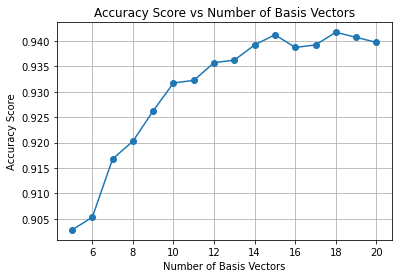

In [427]:
scores=[]
for i in range(len(k)):
    score=accuracy_score(y_test.loc[0,:],predictions[:,i])
    scores.append(score)
data={"Basis vectors":list(k), "accuracy_score":scores}

plt.plot(k, scores, 'o-')
plt.xlabel('Number of Basis Vectors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Number of Basis Vectors')
plt.grid(True)
plt.show()

### When we use 18 basis vectors the exact accuracy is:

In [428]:
total_data = predictions.shape[0]
misclassified = np.where(y_test.loc[0,:] != predictions[:, 13])
initial_accuracy = (total_data-len(misclassified[0]))/total_data
print("The unfiltered accuracy for the main algorithm is: ", initial_accuracy)

The unfiltered accuracy for the main algorithm is:  0.9417040358744395


### The accuracy with 15 basis vectors seems really close. Is it better  than 18 though?

In [429]:
misclassified_15 = np.where(y_test.loc[0,:] != predictions[:, 10])
accuracy_for_15 = (total_data-len(misclassified_15[0]))/total_data_15
print("The unfiltered accuracy for the main algorithm is: ", accuracy_for_15)

The unfiltered accuracy for the main algorithm is:  0.9412057797708022


### Confusion Matrix

We create a confusion matrix that will show how well the data are classified and possibly spot some "confusions" between numbers. For example, 5 seems to be misclassified mostly as a 7 and 9 as a 4.

In [430]:
pd.set_option('display.max_colwidth',12)
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test.loc[0,:],predictions[:,13]))
confusion_matrix_df = confusion_matrix_df.rename(columns = labels, index = labels)
confusion_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,355,0,2,0,1,0,0,0,0,1
1,0,259,0,0,3,0,2,0,0,0
2,8,1,178,2,5,0,0,1,3,0
3,2,0,3,150,1,6,0,1,2,1
4,2,1,0,0,185,2,0,3,0,7
5,7,1,1,5,0,141,0,0,2,3
6,2,1,0,0,2,1,163,0,1,0
7,0,1,1,0,3,0,0,141,0,1
8,2,0,1,6,0,1,0,0,153,3
9,0,2,0,1,4,0,0,3,2,165


### Classification Report

Moreover, we perform a classification report to see more trustworthy metrics like F1-score. Accuracy is a good metric but especially in multi-class classification it can be misleading. The numbers 3 and 5 seem to be the most difficult to classify, while 1 is (as expected) the easiest. Also, it should be noted that 6 has surprisingly good results.

In [431]:
print(classification_report(y_test.loc[0,:],predictions[:,13]))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       359
           1       0.97      0.98      0.98       264
           2       0.96      0.90      0.93       198
           3       0.91      0.90      0.91       166
           4       0.91      0.93      0.92       200
           5       0.93      0.88      0.91       160
           6       0.99      0.96      0.97       170
           7       0.95      0.96      0.95       147
           8       0.94      0.92      0.93       166
           9       0.91      0.93      0.92       177

    accuracy                           0.94      2007
   macro avg       0.94      0.94      0.94      2007
weighted avg       0.94      0.94      0.94      2007



But why are some numbers misclassified? Below we plot some examples of some poorly written numbers that cause our algorithm to fail occasionally.

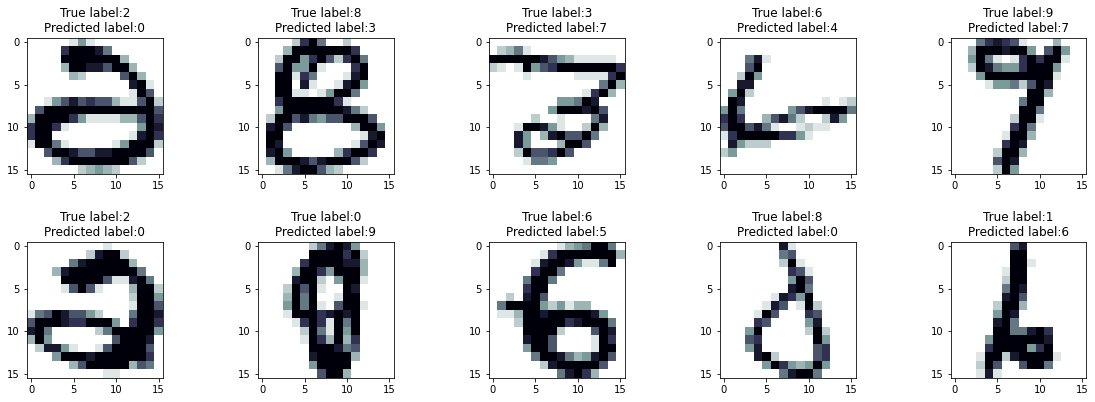

In [432]:
plt.figure(figsize=(20, 10))
columns = 5

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

for i in range(2, 12):
    misclassified_id = misclassified[0][i]
    image = x_test[misclassified_id]

    plt.subplot(int(10 / columns + 1), columns, i - 1)
    plt.imshow(image.to_numpy().reshape(16, 16), cmap=cmap)
    plt.title("True label:" + str(y_test.loc[0, misclassified_id]) + '\n' + "Predicted label:" + str(
        predictions[misclassified_id, 13]))

plt.show()

The following plot will show the difference in singular values between each digit. We hope to shed some light to the peculiarities of each digit, so that we can choose a different number of basis vectors for some.

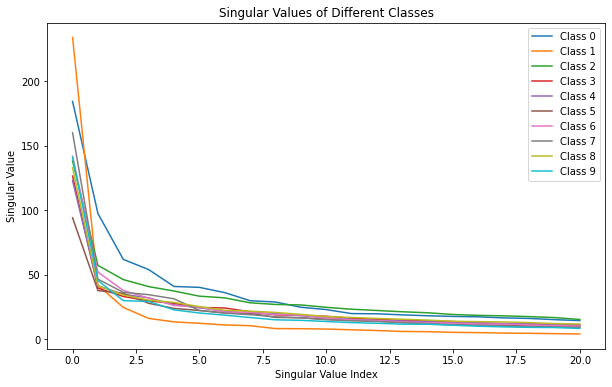

In [433]:
singular_values = []

for i in range(10):
    singular_values.append(singular_matrix['s' + str(i)])

# Plotting singular values for each class
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(singular_values[i], label='Class {}'.format(i))
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Singular Values of Different Classes')
plt.legend()
plt.show()

From the above plot we see that the singular values of '0' and '2' have a significant difference from those of '1'. This does not necessarily mean that they will need a different basis vector, as we can't really weigh the importance of the data that we are cutting, but we will attempt to calculate the ideal number of basis vectors, and we expect to see a lower number for '1'.

In fact, we don't need to calculate them because our matrix "predictions" contains everything we need. All we need to do is extract the information. We will create a matrix called "accuracy_matrix" that will contain the accuracy of the classification of every digit, for all the distinct basis' from 5 to 20. This would be a (very) long process in terms of computation time but "predictions" matrix helps us reduce significantly.

### First, calculate the total appearances of each digit using the confusion matrix we generated in the first part.

In [434]:
total_sums = {}

for digit in labels.values():
    total_sums[digit] = confusion_matrix_df.loc[digit].sum()

print(total_sums)


{'0': 359, '1': 264, '2': 198, '3': 166, '4': 200, '5': 160, '6': 170, '7': 147, '8': 166, '9': 177}


### Create the accuracy matrix

In [435]:
accuracy_matrix = np.zeros((10, 16))
for counter, column in enumerate(predictions.T):
    for digit in labels.values():
        class_accuracy = np.where((column == np.array(y_test)[0]) & (np.array(y_test)[0] == int(digit)))[0]
        accuracy_matrix[int(digit), counter] = (len(class_accuracy))/total_sums[digit]

### Extract the ideal basis vectors for each digit

In [436]:
ideal_basis_vecs = {}
for counter, row in enumerate(accuracy_matrix):
    my_max = 0
    max_value = 0
    for index, value in enumerate(row):
        if value > max_value:
            my_max = index
            max_value = value
    ideal_basis_vecs[counter] = my_max
    
for i in labels.values():
    print("The ideal number of basis vectors for " + str(i) + " for this specific dataset is:", ideal_basis_vecs[int(i)]+5)

The ideal number of basis vectors for 0 for this specific dataset is: 14
The ideal number of basis vectors for 1 for this specific dataset is: 9
The ideal number of basis vectors for 2 for this specific dataset is: 7
The ideal number of basis vectors for 3 for this specific dataset is: 18
The ideal number of basis vectors for 4 for this specific dataset is: 14
The ideal number of basis vectors for 5 for this specific dataset is: 18
The ideal number of basis vectors for 6 for this specific dataset is: 20
The ideal number of basis vectors for 7 for this specific dataset is: 15
The ideal number of basis vectors for 8 for this specific dataset is: 16
The ideal number of basis vectors for 9 for this specific dataset is: 10


Of course these results are tuned precisely for this dataset, and specifically the test dataset. We can't use them to run the algorithm again because that would be obvious overfitting. The reason we generated them and what the above output really says is that for the current dataset we might have a general total best when we have 18 basis vectors, but each digit achieves the personal best accuracy for a different basis. It does not mean that if we take another totally foreign dataset that these vectors would be ideal. That could happen occasionally but not necessarily.

The biggest part of these results, can be indeed used in order to conclude what is approximately a good basis vector for a digit, but that's not the case for all the digits. For example, we can see both in the plot and in these results, that '1' needs far less basis vectors than the other digits. This is intuitively correct as '1' is a relatively simple digit to write and most likely the simplest from all the digits. On the other hand, we see for example that '2' needs 3 basis vectors and intuitely this is confusing, as '2' is not a particularly easy number to classify. What happens is that '2' was classified with a great accuracy on this dataset, but if we wanted to generalize our algorithm for bigger datasets and we set 3 basis vectors for '2', there is a (very) big possibility that the results would not be optimal. Probably they would be far from optimal. 

To sum up, yes each digit is motivated to use a different number of basis vectors than 18 that was the general best. We calculate effectively using the matrix "predictions" the ideal number of basis vectors for each digit on the test dataset. 

Finally, since the exercise is asking for some experiments, even though it is partly overfitting we will run the algorithm again using 18 vectors for each digit, but for digits 0 and 1 we will use the ideal vectors we found above. If we did everything right, the initial accuracy should be improved.

In [437]:
ideal_basis = [14, 9, 18, 18, 18, 18, 18, 18, 18, 18]
I = np.eye(x_test.shape[0])
len_test=x_test.shape[1]
results = {}
digit_specific_accuracies = []
predictions_bonus_1 =np.empty((y_test.shape[1],0), dtype = int)

total_correct_preds = 0

for digit in range(10):
    _, prediction_new = predictor(x_test, ideal_basis[digit], len_test, predictions_bonus_1, I)
    correct_predictions = np.sum((prediction_new == np.array([y_test]))[0] & (np.array([y_test])[0] == digit))
    total_predictions = np.sum(np.array([y_test])[0] == digit)
    digit_specific_accuracies.append(correct_predictions/total_predictions)
    total_correct_preds += correct_predictions
    
total_accuracy = total_correct_preds/len_test
print("The improved accuracy is: ", total_accuracy)
print(f"We improved the initial accuracy by:  {(((total_accuracy-initial_accuracy)/initial_accuracy)*10):.2f} %")

The improved accuracy is:  0.942700548081714
We improved the initial accuracy by:  0.01 %


# Bonus Tasks

## Two-Phase SVD

### Predictor #Vol_2

This algorithm will be implemented with a similar function like "predictor". The difference is that inside there will be an if statement, that will check if the first column is enough to perform the classification. If it is, then classify the number, if not, then run the initial algorithm. That will happen with the help of a threshold variable that will be given as an argument to the function.

In general, there is no rule of thumb in this exercise. Someone that wants the best results in terms of accuracy would not proceed to implement this algorithm. It will not have better results than the basic version of the algorithm in terms of accuracy. The reason that somebody would use this algorithm, is due to saving operations and computing time. So we have the "permission" to set the threshold low enough in a way, that the first phase will make at least a noteworthy number of classifications. It won't generate as good results in terms of accuracy but it will save time. The real question that arises is, how much accuracy are we willing to sacrifice in order to save operations?

In [438]:
def predictor_bonus(x_test, threshold):
    counter1 = 0
    k = np.arange(5, 21)
    I = np.eye(x_test.shape[0])
    len_test=x_test.shape[1]

    # First Phase: Check if 1 column is enough to make the classification
    prediction_1_basis = []
    notes = {}
    for i in range(len_test):
        residuals = []
        for j in range(10):
            U = left_singular["u"+str(j)][:,0:1]
            res = np.dot(U, np.dot(U.T, x_test[i]))
            res = norm(x_test[i] - res)
            residuals.append(res)
        # Take the first and second lower values in residuals and compare them. If their relative ratio is less than the 
        # threshold, then make the classification. If its bigger, continue and make the classification in Phase 2.
        min_res = min(residuals)
        index_min = np.argmin(residuals)
        residuals.pop(index_min)
        sec_min_res = min(residuals)
        if (min_res/sec_min_res) <= threshold:
            prediction_1_basis.append(index_min)
            notes[i] = counter1
            counter1+=1
    predictions_bonus=np.empty((y_test.shape[1],0), dtype = int)

    # Second Phase
    for t in list(k):
        prediction_t_basis = []
        for i in range(len_test):
            # Check if you classified this row already in the first phase
            # 'notes' is a dictionary in order to make the retrievals as fast as possible (it has complexity O(1))
            if i in notes:
                prediction_t_basis.append(prediction_1_basis[notes[i]])
                continue
            else:
                residuals = []
                for j in range(10):
                    U=left_singular["u"+str(j)][:,0:t]
                    res = np.dot(U, np.dot(U.T, x_test[i]))
                    res = norm(x_test[i] - res)
                    residuals.append(res)
                index_min = np.argmin(residuals)
                prediction_t_basis.append(index_min)
        prediction_t_basis = np.array(prediction_t_basis)
        predictions_bonus = np.hstack((predictions_bonus,prediction_t_basis.reshape(-1,1)))

    return predictions_bonus, counter1

### Tune the threshold. Which balances accuracy and efficiency best?

### We set the maximum accuracy loss to be 1%

After performing some experiments we conclude that the accuracy will exceed 1% when the threshold is between 0.85 and 0.9. We attempt to find the optimal threshold with precision 10\^(-3). Spoiler alert, the optimal threshold within this error is 0.8875, you can remove the comment below and see for yourself, I am skipping it as it significantly increases run time (as expected since it runs x5 times).

In [439]:
#threshold = np.linspace(0.85, 0.9, 5)
threshold = [0.8875]
accuracies = []

start_time_2 = time.time()
for counter, i in enumerate(threshold):
    predictions_bonus, counter1 = predictor_bonus(x_test, i)
    misclassified_i = np.where(y_test.loc[0,:] != predictions_bonus[:, 13])
    new_accuracy = (total_data-len(misclassified_i[0]))/total_data
    accuracies.append(new_accuracy)
    if initial_accuracy - new_accuracy > 0.01:
        break;
optimal_threshold = threshold[counter-1]
print("The optimal threshold is: ", optimal_threshold)
if len(accuracies)>=2:
    print("The accuracy is: ", accuracies[-2])
else:
    print("The accuracy is: ", accuracies[0])

elapsed_time_2 = time.time() - start_time_2
print("Elapsed time: {:.2f} seconds".format(elapsed_time_2))

The optimal threshold is:  0.8875
The accuracy is:  0.931738913801694
Elapsed time: 26.81 seconds


### How frequently was the 2nd stage unnecessary?

In [440]:
result = (1 - (total_data-counter1) / total_data) * 100
formatted_result = "{:.2f}".format(result)
print(formatted_result, "%")

57.10 %


### We lost 1% accuracy. What did we earn in terms of efficiency?

In [441]:
time_earned = elapsed_time_1/elapsed_time_2
print("This algorithm is {:.2f} times faster than the original one".format(time_earned))

This algorithm is 2.17 times faster than the original one


### Plot the accuracy

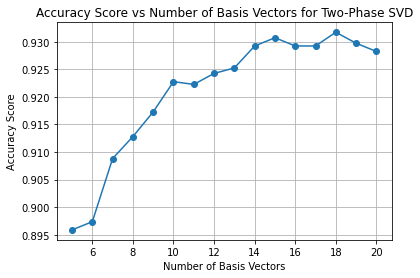

In [442]:
scores=[]
for i in range(len(k)):
    score=accuracy_score(y_test.loc[0,:],predictions_bonus[:,i])
    scores.append(score)
data={"Basis vectors":list(k), "accuracy_score":scores}

plt.plot(k, scores, 'o-')
plt.xlabel('Number of Basis Vectors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Number of Basis Vectors for Two-Phase SVD')
plt.grid(True)
plt.show()

### The confusion matrix of Two-Phase SVD

In [443]:
pd.set_option('display.max_colwidth',12)
confusion_matrix_df_2 = pd.DataFrame(confusion_matrix(y_test.loc[0,:],predictions_bonus[:,13]))
confusion_matrix_df_2 = confusion_matrix_df_2.rename(columns = labels, index = labels)
confusion_matrix_df_2

,0,1,2,3,4,5,6,7,8,9
0,350,0,2,0,1,0,5,0,0,1
1,0,259,0,0,3,0,2,0,0,0
2,8,1,174,3,7,0,0,1,4,0
3,2,0,3,150,1,6,0,1,2,1
4,2,2,0,0,184,1,0,3,0,8
5,7,1,1,5,1,140,0,0,2,3
6,2,1,0,0,2,1,163,0,1,0
7,0,2,1,0,3,0,0,138,0,3
8,2,2,1,6,0,1,0,0,151,3
9,0,4,0,1,6,0,0,3,2,161


#### The classification report of Two-Phase SVD

In [444]:
print(classification_report(y_test.loc[0,:],predictions_bonus[:,13]))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       359
           1       0.95      0.98      0.97       264
           2       0.96      0.88      0.92       198
           3       0.91      0.90      0.91       166
           4       0.88      0.92      0.90       200
           5       0.94      0.88      0.91       160
           6       0.96      0.96      0.96       170
           7       0.95      0.94      0.94       147
           8       0.93      0.91      0.92       166
           9       0.89      0.91      0.90       177

    accuracy                           0.93      2007
   macro avg       0.93      0.93      0.93      2007
weighted avg       0.93      0.93      0.93      2007

